In [3]:
import numpy as np 
#产生正态分布的数据100组，中心点（0，0），其标准差σ为1
p=np.random.randn(100,2)
#将中心点移动到（3.5,3.5），作为正类
for i in range(100):
    p[i][0]+=3.5
    p[i][1]+=3.5

#产生正态分布的数据100组，中心点（0，0），其标准差σ为1，作为负类
f=np.random.randn(100,2)

import pandas as pd 

#将np数组转换成dataframe
df_p=pd.DataFrame(p,columns=['x','y'])
#加上标签z,正类标签1
df_p['z']=1

#将np数组转换成dataframe
df_f=pd.DataFrame(f,columns=['x','y'])
#加上标签z,负类标签0
df_f['z']=0

#将正负类合并成一个dataframe
res = pd.concat([df_p, df_f], axis=0)
res.head(10)

,x,y,z
0,4.198390,2.360253,1
1,4.802608,4.237265,1
2,3.571716,4.246163,1
3,3.389474,2.777169,1
4,3.407080,2.969104,1
5,3.962996,4.118016,1
6,2.679486,1.483121,1
7,3.547707,3.448452,1
8,3.181810,4.744277,1
9,3.412752,3.591759,1


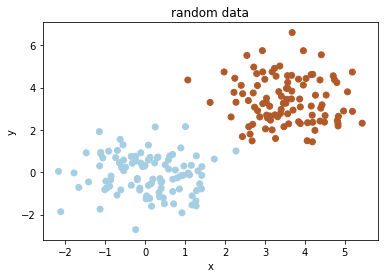

In [5]:
import matplotlib.pyplot as plt

#绘制出数据集的散点图
plt.scatter(res['x'], res['y'], c=res['z'],cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.title('random data')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

#划分测试集
train_x,test_x,train_y,test_y=train_test_split(res[['x','y']],res[['z']],test_size=0.3,random_state=0)
len(train_x)

140

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#构建参数网格
parameters =[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf=GridSearchCV(estimator=svm.SVC(),param_grid=parameters,cv=5,n_jobs=-1,scoring='precision')
clf.fit(train_x,train_y)

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [21]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [23]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.987 (+/-0.053) for {'C': 1, 'kernel': 'linear'}
0.987 (+/-0.053) for {'C': 10, 'kernel': 'linear'}
0.987 (+/-0.053) for {'C': 100, 'kernel': 'linear'}
0.987 (+/-0.053) for {'C': 1000, 'kernel': 'linear'}



In [30]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(test_y, clf.predict(test_x)))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        31
          1       1.00      1.00      1.00        29

avg / total       1.00      1.00      1.00        60


